

---


# **TASK 4 - Exploratory Data Analysis - Terrorism**

## **AUTHOR - AKSHAYA RAJ S A**

## **INTERN@THE SPARKS FOUNDATION**


---




# **IMPORTING LIBRARIES AND DATASET**


---


In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving globalterrorismdb_0718dist.csv to globalterrorismdb_0718dist (1).csv


In [ ]:
import io
sample = pd.read_csv(io.BytesIO(uploaded['globalterrorismdb_0718dist.csv']), encoding='ISO-8859-1')



---
# **DATA EXPLORATION**


---






In [ ]:
sample.shape

(181691, 135)

In [ ]:
sample.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
sample.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
sample.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country_Name','provstate':'State_Name',
                       'region_txt':'Region_Name','attacktype1_txt':'Attack_Type','targtype1_txt':'Target_Type','target1':'Target','nkill':'Kills',
                       'nwound':'Wounded','summary':'Summary','gname':'Group', 'city':'City_Name',
                       'weaptype1_txt':'Weapon_Type','motive':'Motive'},inplace=True)
sample=sample[['Year','Month','Day','Country_Name','State_Name','Region_Name','City_Name','Attack_Type','Kills',
               'Wounded','Target_Type','Target','Group','Weapon_Type','Motive','Summary']]

In [ ]:
sample.shape

(181691, 16)

In [ ]:
sample.head(4)

,Year,Month,Day,Country_Name,State_Name,Region_Name,City_Name,Attack_Type,Kills,Wounded,Target_Type,Target,Group,Weapon_Type,Motive,Summary
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,Assassination,1.0,0.0,Private Citizens & Property,Julio Guzman,MANO-D,Unknown,NaN,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),0.0,0.0,Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,Unknown,NaN,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,1.0,0.0,Journalists & Media,Employee,Unknown,Unknown,NaN,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,Bombing/Explosion,NaN,NaN,Government (Diplomatic),U.S. Embassy,Unknown,Explosives,NaN,NaN


In [ ]:
sample['Kills']=sample['Kills'].fillna(0)
sample['Wounded'] = sample['Wounded'].fillna(0)
sample['Victims'] = sample['Kills']+sample['Wounded']

In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          181691 non-null  int64  
 1   Month         181691 non-null  int64  
 2   Day           181691 non-null  int64  
 3   Country_Name  181691 non-null  object 
 4   State_Name    181270 non-null  object 
 5   Region_Name   181691 non-null  object 
 6   City_Name     181257 non-null  object 
 7   Attack_Type   181691 non-null  object 
 8   Kills         181691 non-null  float64
 9   Wounded       181691 non-null  float64
 10  Target_Type   181691 non-null  object 
 11  Target        181055 non-null  object 
 12  Group         181691 non-null  object 
 13  Weapon_Type   181691 non-null  object 
 14  Motive        50561 non-null   object 
 15  Summary       115562 non-null  object 
 16  Victims       181691 non-null  float64
dtypes: float64(3), int64(3), object(11)
memory usage



---

# **YEAR AND FREQUENCY OF ATTACK ANALYSIS**



---





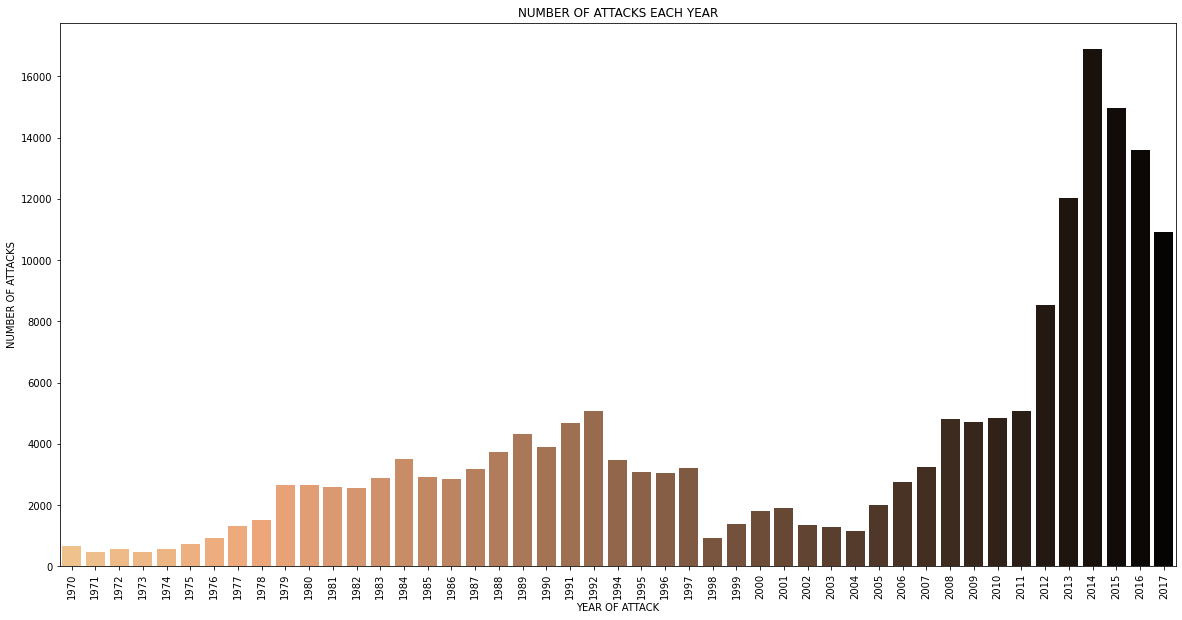

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'Year', data=sample, palette = 'copper_r')
plt.xticks(rotation = 90)
plt.xlabel('YEAR OF ATTACK')
plt.ylabel('NUMBER OF ATTACKS')
plt.title('NUMBER OF ATTACKS EACH YEAR')
plt.show()

# **OBSERVATION**




*   2014 is the year which reported the most number of attacks.






---
# **REGION WISE IN EACH YEAR**



---





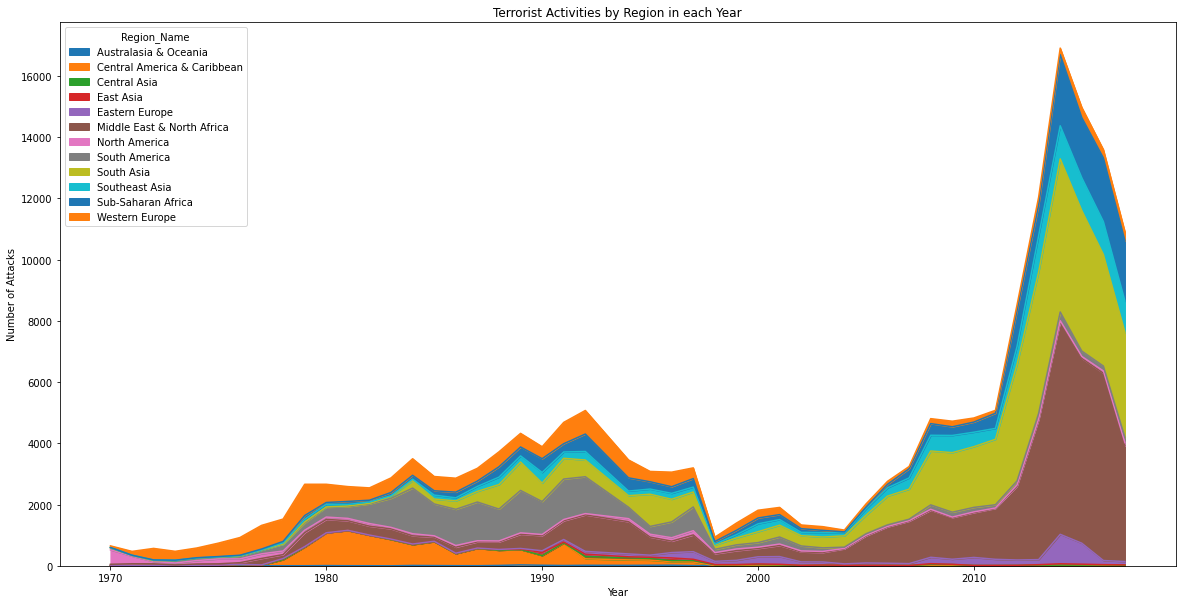

In [ ]:
pd.crosstab(sample['Year'], sample['Region_Name']).plot(kind='area', figsize = (20,10))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()



---
# **COUNTRY-WISE ATTACKS**


---





In [ ]:
print("Number of Countries : ", len(sample['Country_Name'].unique()))

Number of Countries :  205


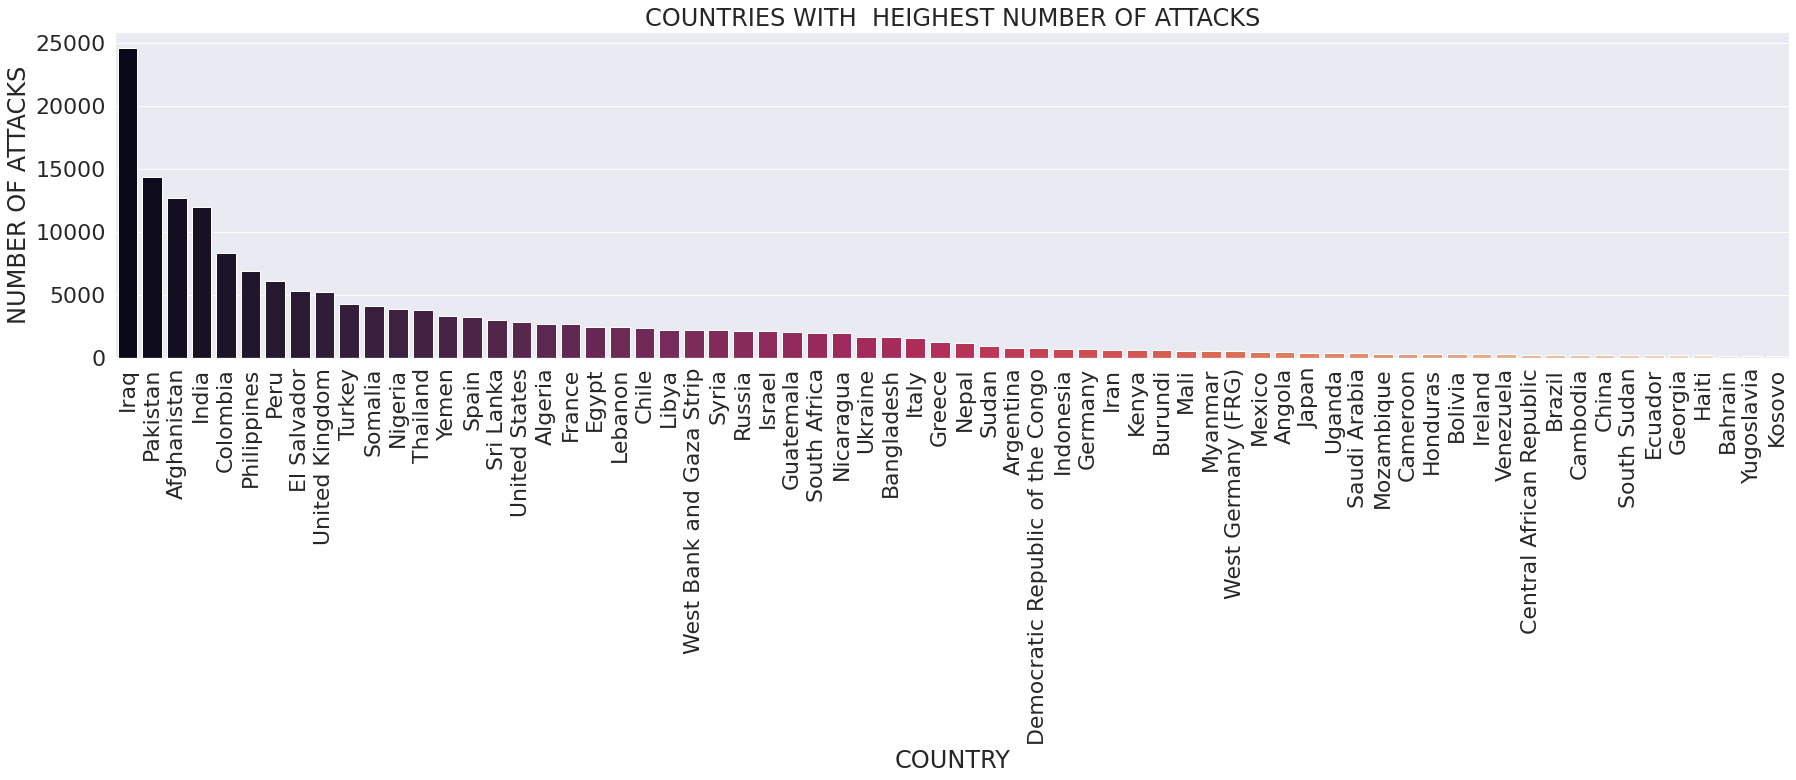

In [ ]:
plt.figure(figsize = (30,6))
sns.countplot(x = 'Country_Name', data=sample, palette = 'rocket',  order = sample['Country_Name'].value_counts().index[:68])
plt.xticks(rotation = 90)
plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF ATTACKS')
plt.title('COUNTRIES WITH  HEIGHEST NUMBER OF ATTACKS')
plt.show()

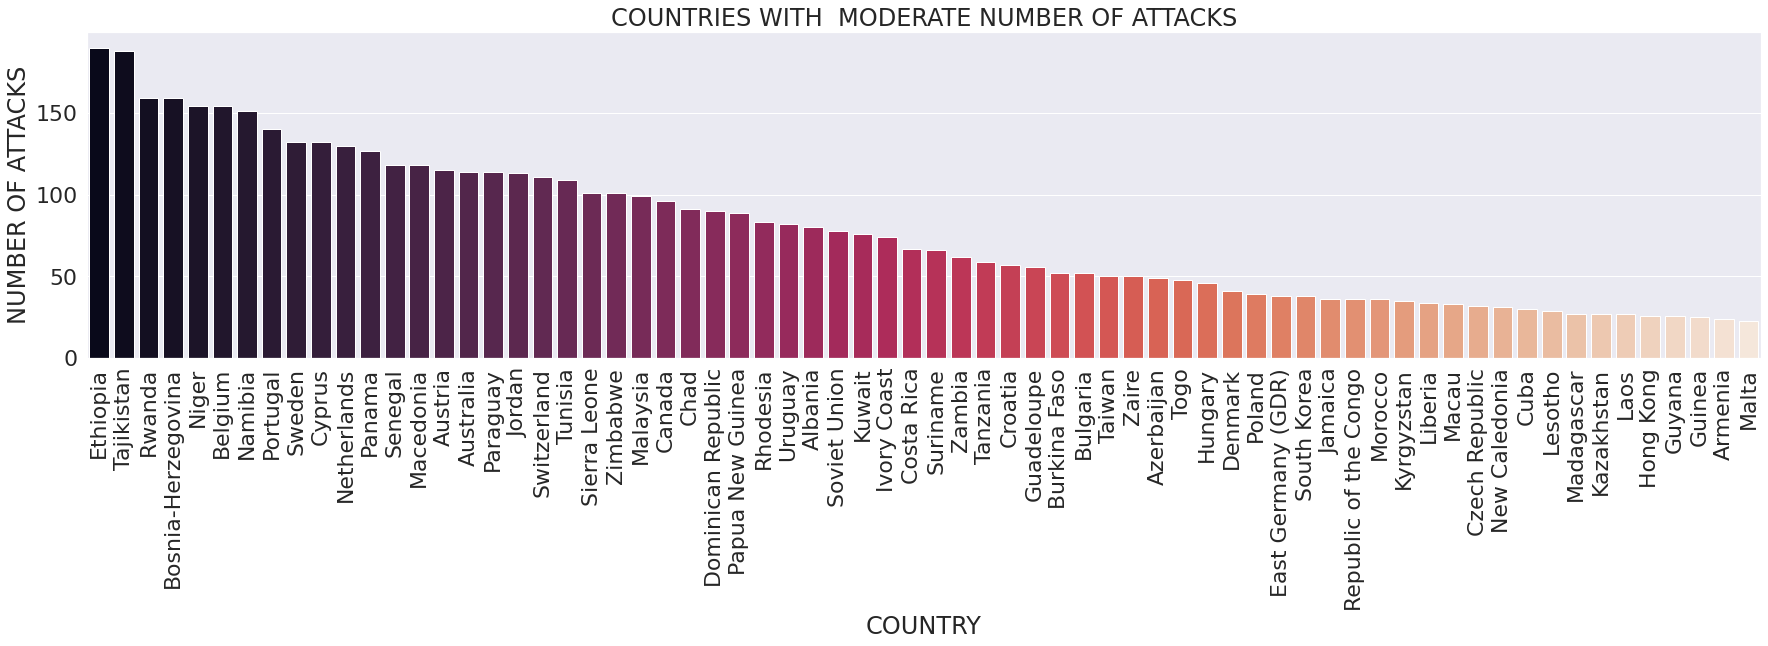

In [ ]:
plt.figure(figsize = (30,6))
sns.countplot(x = 'Country_Name', data=sample, palette = 'rocket',  order = sample['Country_Name'].value_counts().index[68:136])
plt.xticks(rotation = 90)
plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF ATTACKS')
plt.title('COUNTRIES WITH  MODERATE NUMBER OF ATTACKS')
plt.show()

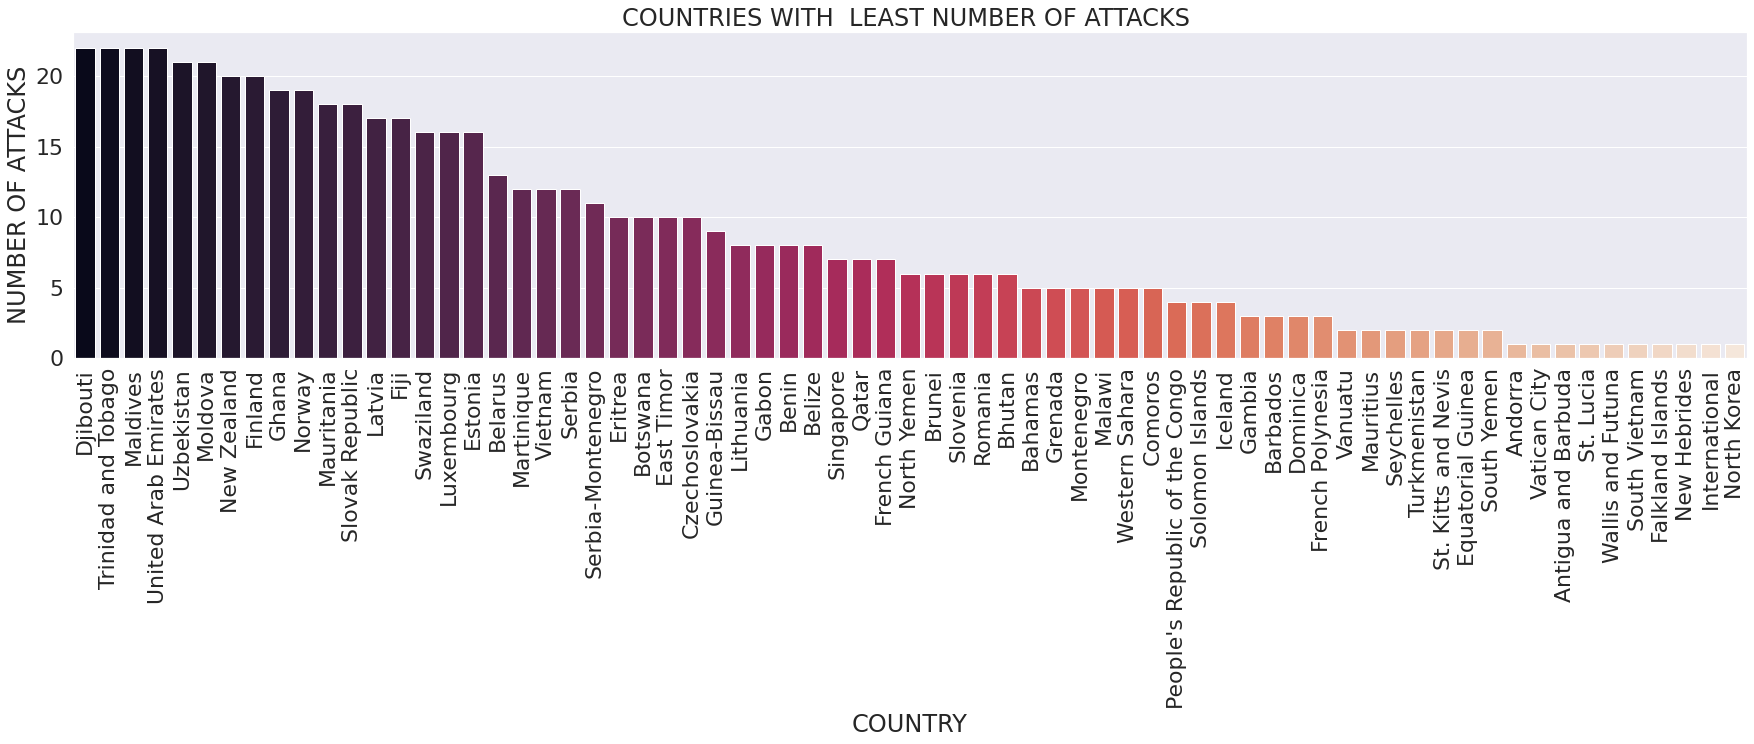

In [ ]:
plt.figure(figsize = (30,6))
sns.countplot(x = 'Country_Name', data=sample, palette = 'rocket',  order = sample['Country_Name'].value_counts().index[136:205])
plt.xticks(rotation = 90)
plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF ATTACKS')
plt.title('COUNTRIES WITH  LEAST NUMBER OF ATTACKS ')
plt.show()

In [ ]:
sample_vic = sample.groupby('Country_Name')['Victims'].agg('sum').reset_index().sort_values(by='Victims', ascending=False).reset_index(drop=True)

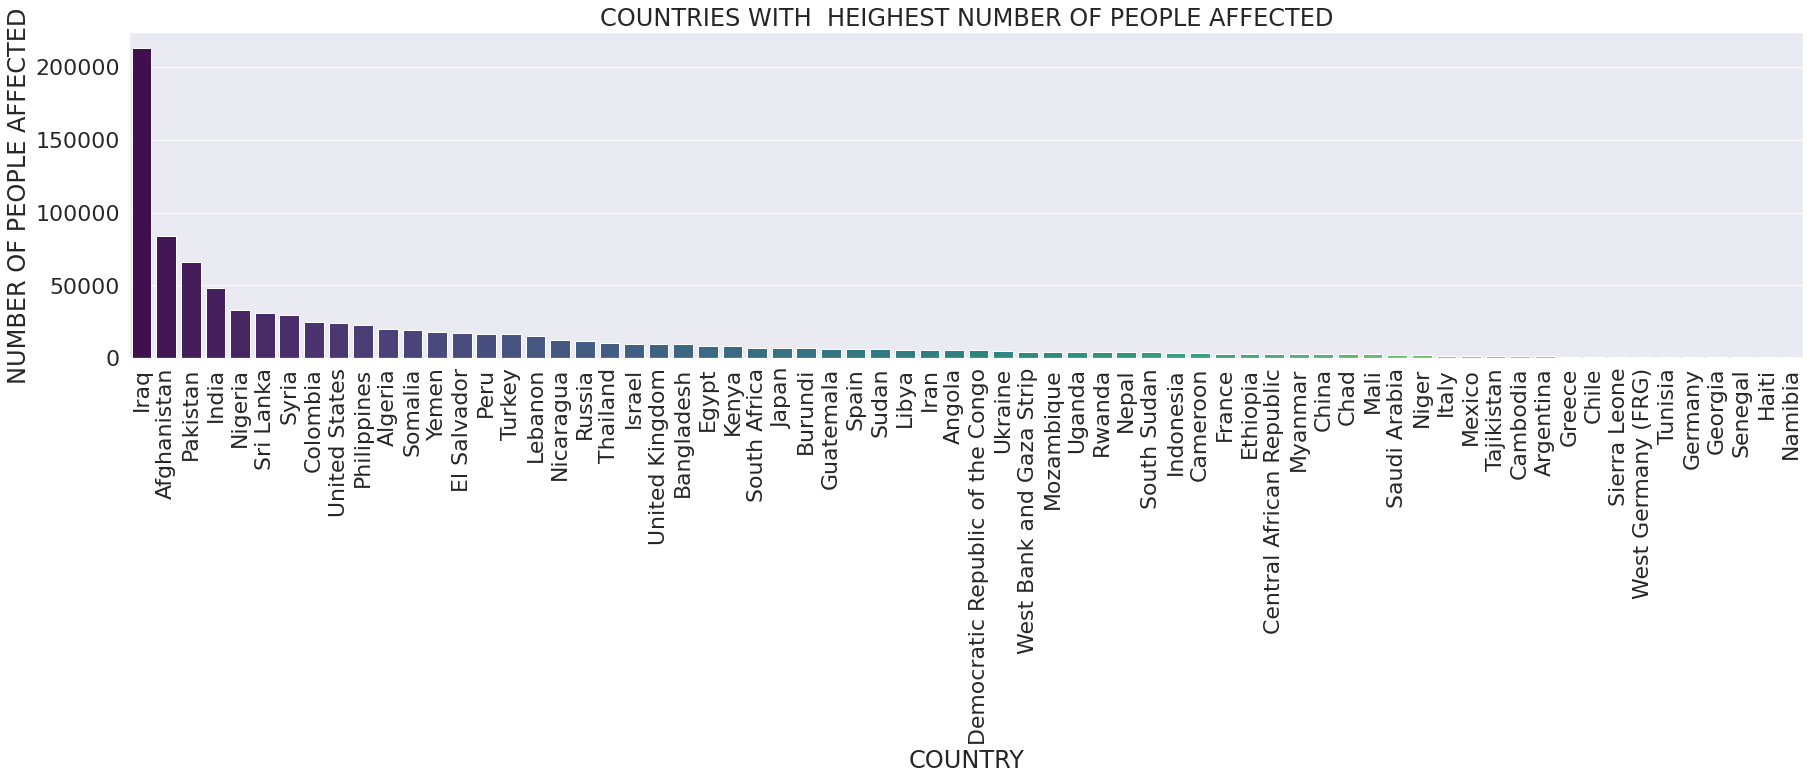

In [ ]:
plt.figure(figsize = (30,6))
sns.barplot(x = sample_vic["Country_Name"].iloc[0:68], y = sample_vic["Victims"].iloc[0:68], palette="viridis")
plt.xticks(rotation = 90)
plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF PEOPLE AFFECTED')
plt.title('COUNTRIES WITH  HEIGHEST NUMBER OF PEOPLE AFFECTED')
plt.show()

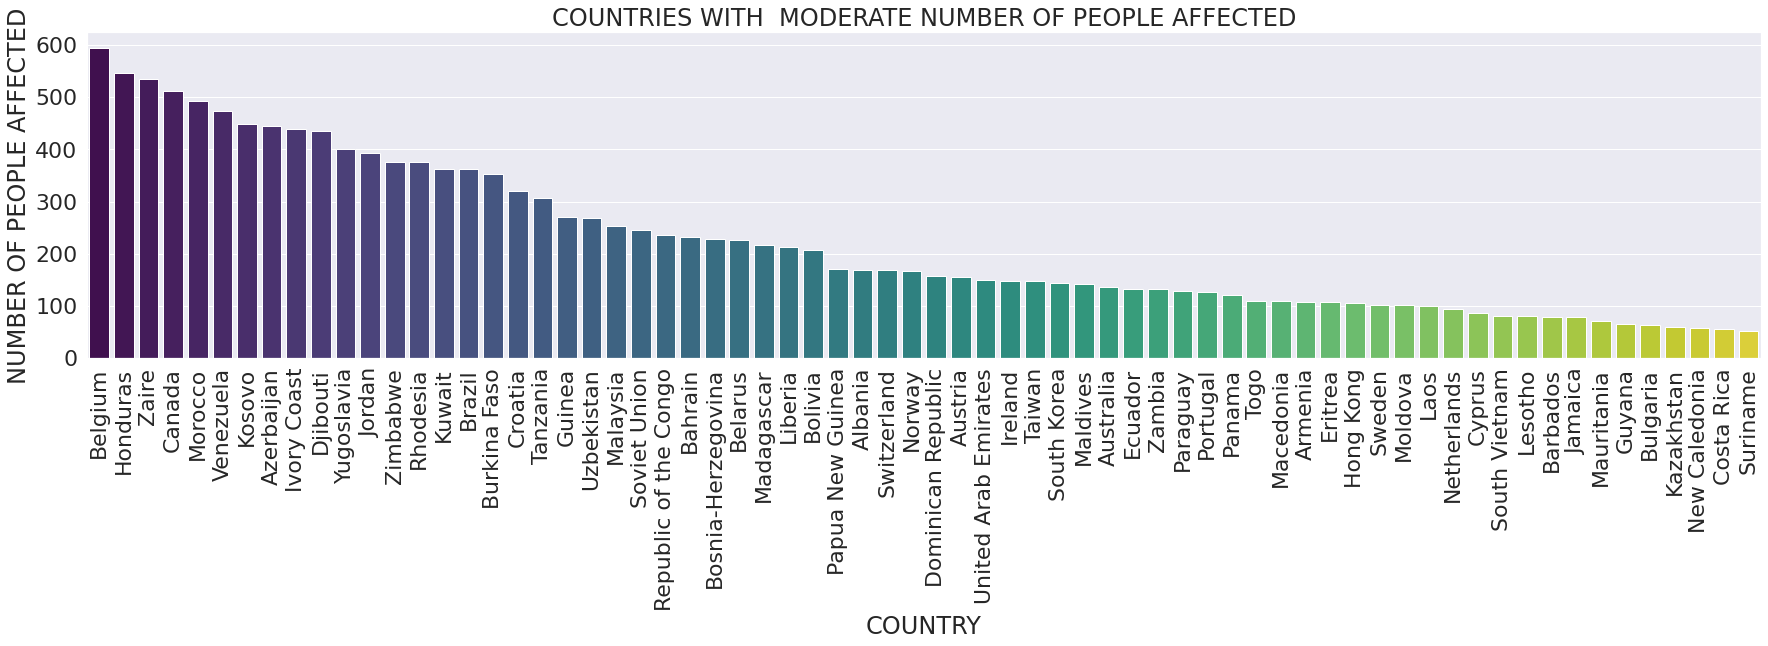

In [ ]:
plt.figure(figsize = (30,6))
sns.barplot(x = sample_vic["Country_Name"].iloc[68:136], y = sample_vic["Victims"].iloc[68:136], palette="viridis")
plt.xticks(rotation = 90)
plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF PEOPLE AFFECTED')
plt.title('COUNTRIES WITH  MODERATE NUMBER OF PEOPLE AFFECTED')
plt.show()

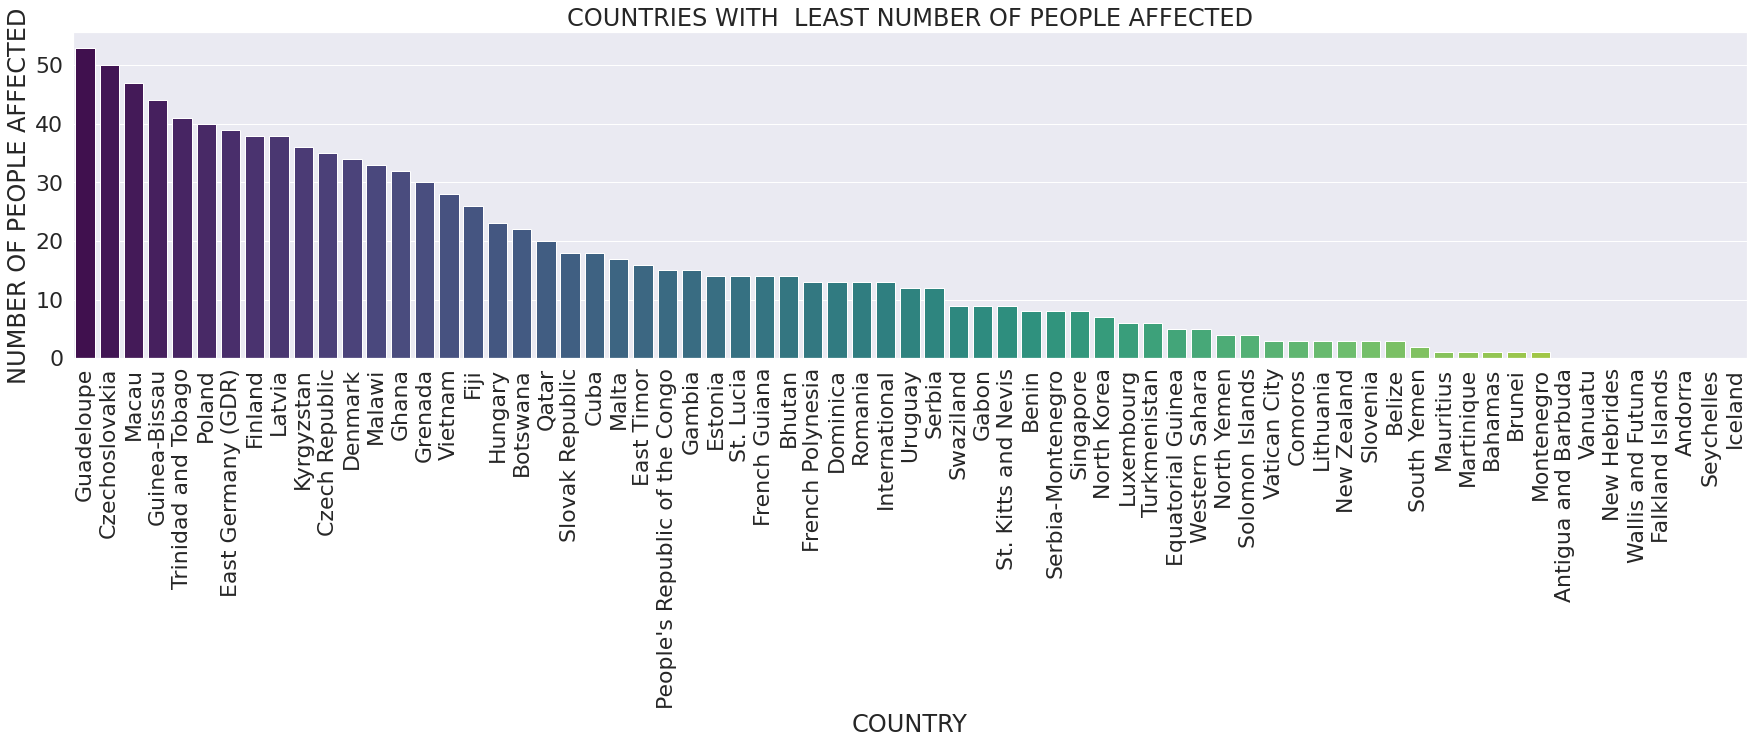

In [ ]:
plt.figure(figsize = (30,6))
sns.barplot(x = sample_vic["Country_Name"].iloc[136:205], y = sample_vic["Victims"].iloc[136:205], palette="viridis")
plt.xticks(rotation = 90)
plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF PEOPLE AFFECTED')
plt.title('COUNTRIES WITH  LEAST NUMBER OF PEOPLE AFFECTED')
plt.show()

In [ ]:
sample_kills = sample.groupby('Country_Name')['Kills'].agg('sum').reset_index().sort_values(by='Kills', ascending=False).reset_index(drop=True)

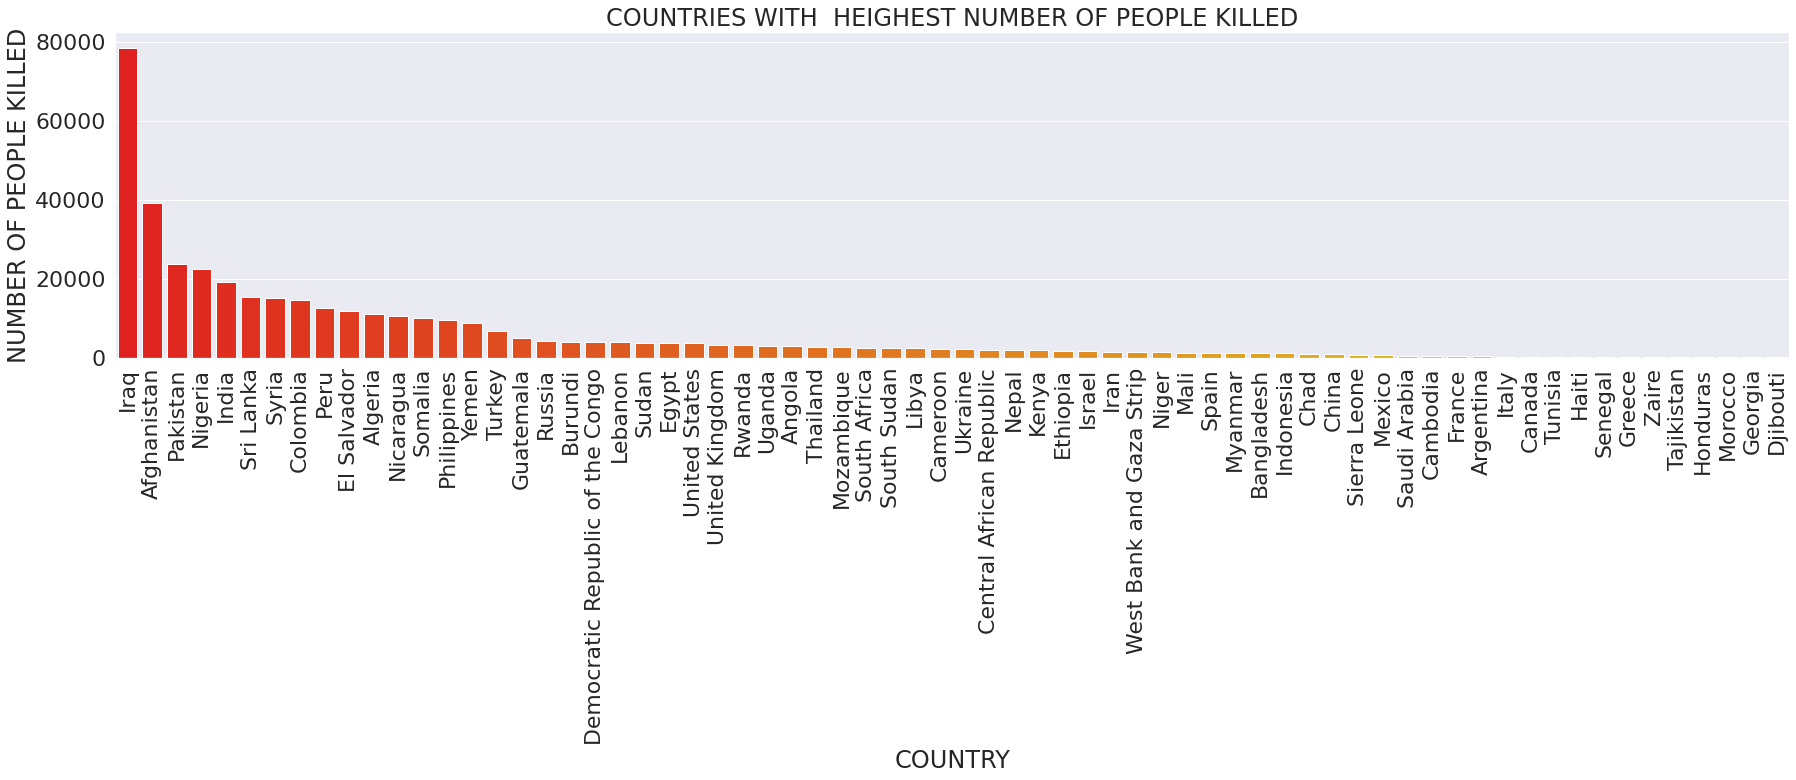

In [ ]:
plt.figure(figsize = (30,6))
sns.barplot(x = sample_kills["Country_Name"].iloc[0:68], y = sample_kills["Kills"].iloc[0:68], palette="autumn")
plt.xticks(rotation = 90)
plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF PEOPLE KILLED')
plt.title('COUNTRIES WITH  HEIGHEST NUMBER OF PEOPLE KILLED')
plt.show()

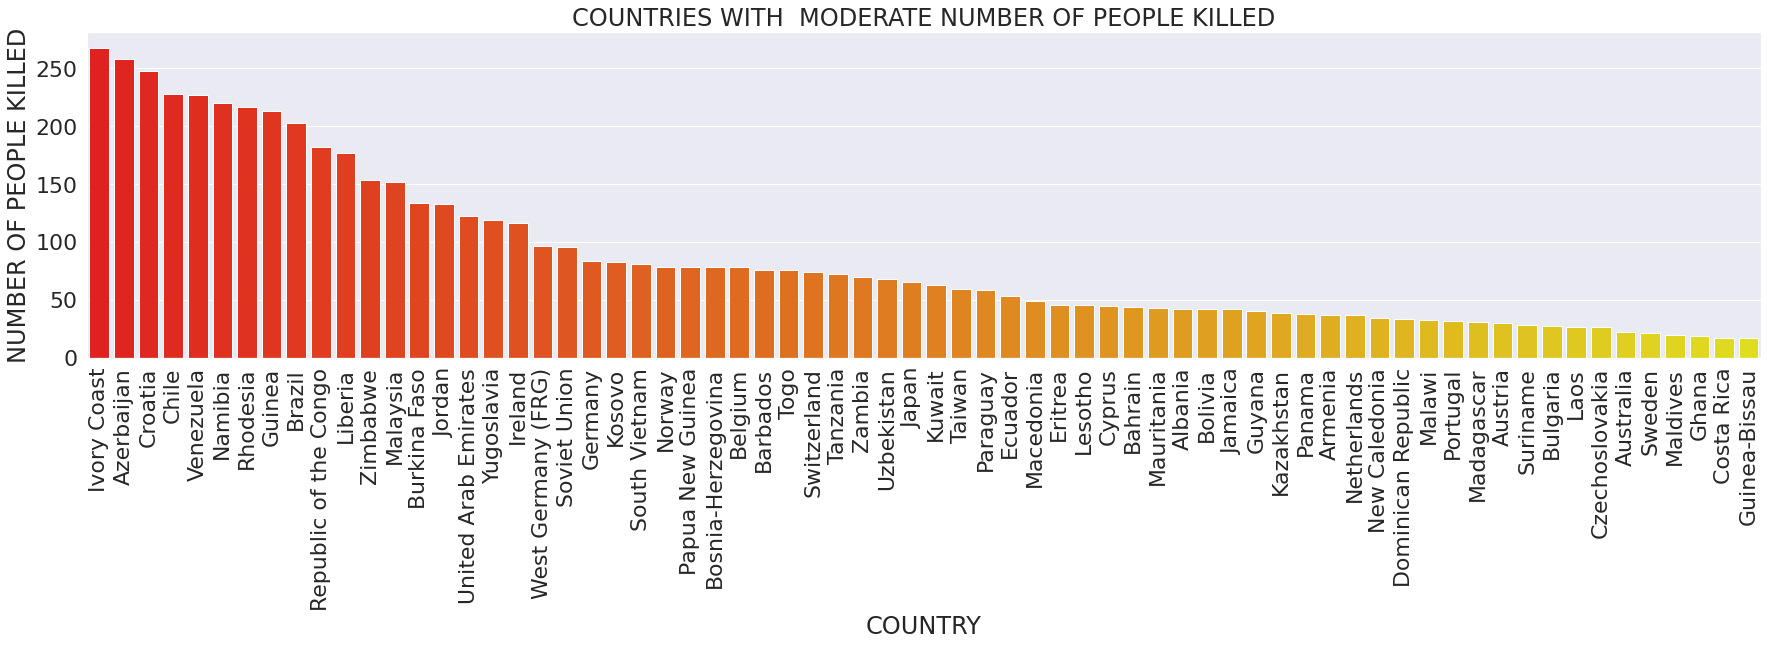

In [ ]:
plt.figure(figsize = (30,6))
sns.barplot(x = sample_kills["Country_Name"].iloc[68:136], y = sample_kills["Kills"].iloc[68:136], palette="autumn")
plt.xticks(rotation = 90)
plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF PEOPLE KILLED')
plt.title('COUNTRIES WITH  MODERATE NUMBER OF PEOPLE KILLED')
plt.show()

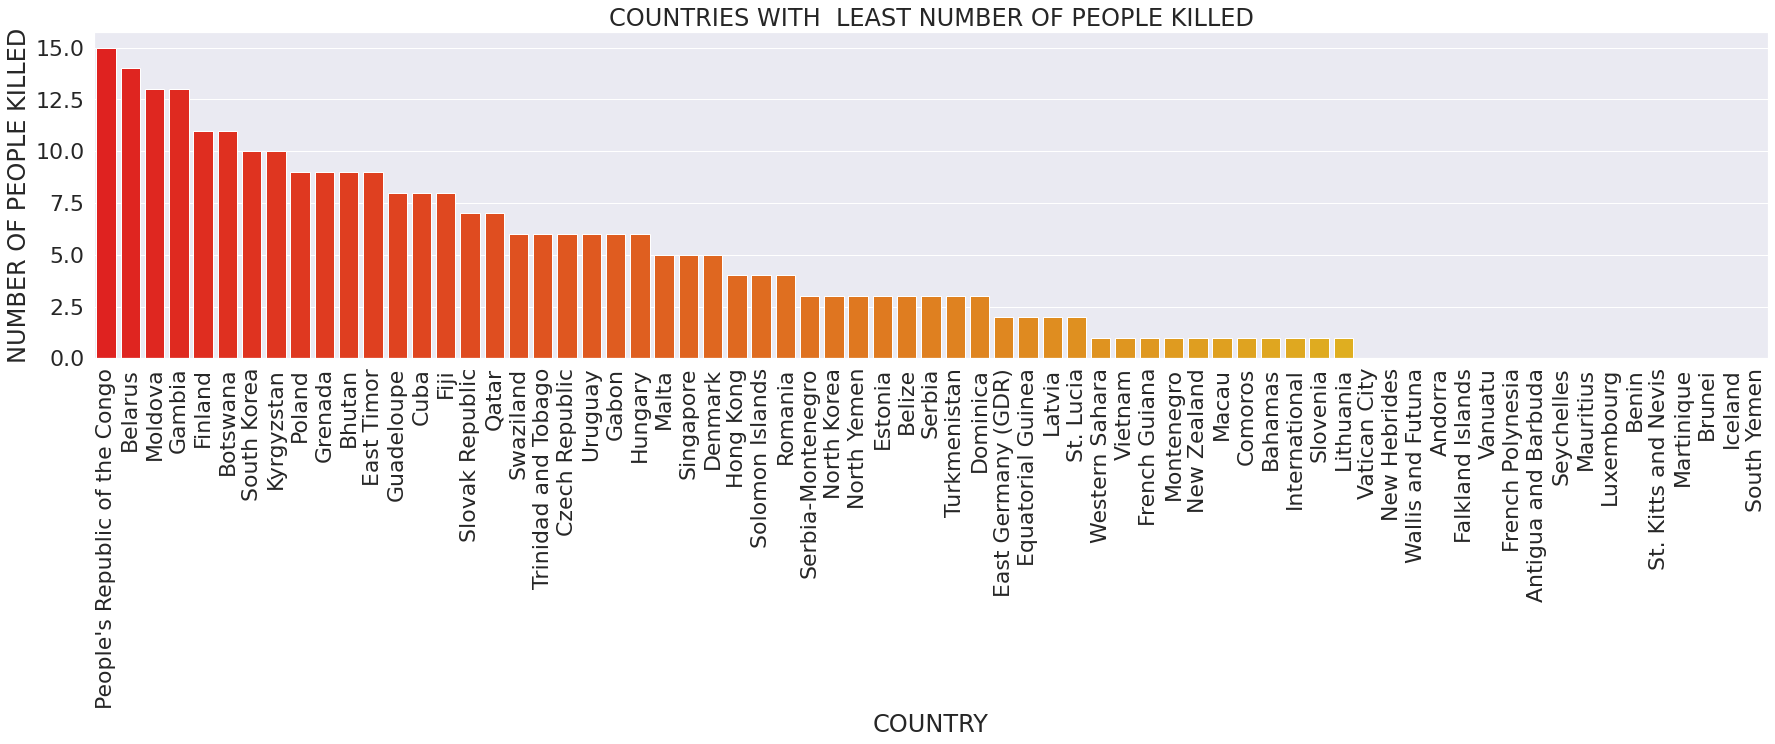

In [ ]:
plt.figure(figsize = (30,6))
sns.barplot(x = sample_kills["Country_Name"].iloc[136:205], y = sample_kills["Kills"].iloc[136:205], palette="autumn")
plt.xticks(rotation = 90)
plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF PEOPLE KILLED')
plt.title('COUNTRIES WITH  LEAST NUMBER OF PEOPLE KILLED')
plt.show()

# **OBSERVATION**

*   Iraq is the country with most number of attacks and most number of people being killed and being victims.

*   In countries like Vatican City. New Hebrides, Wallis and Futuna, Andora, Falkland Islands Vanuatu, French Polynesia Antigua Barbuda, Mauritius, etc have reported nearly zero deaths, least number of attacks and victims.






---
# **GROUP-WISE ANALYSIS**


---




In [ ]:
print('Total Number of Terrorism Groups : ', len(sample['Group'].unique()))

Total Number of Terrorism Groups :  3537


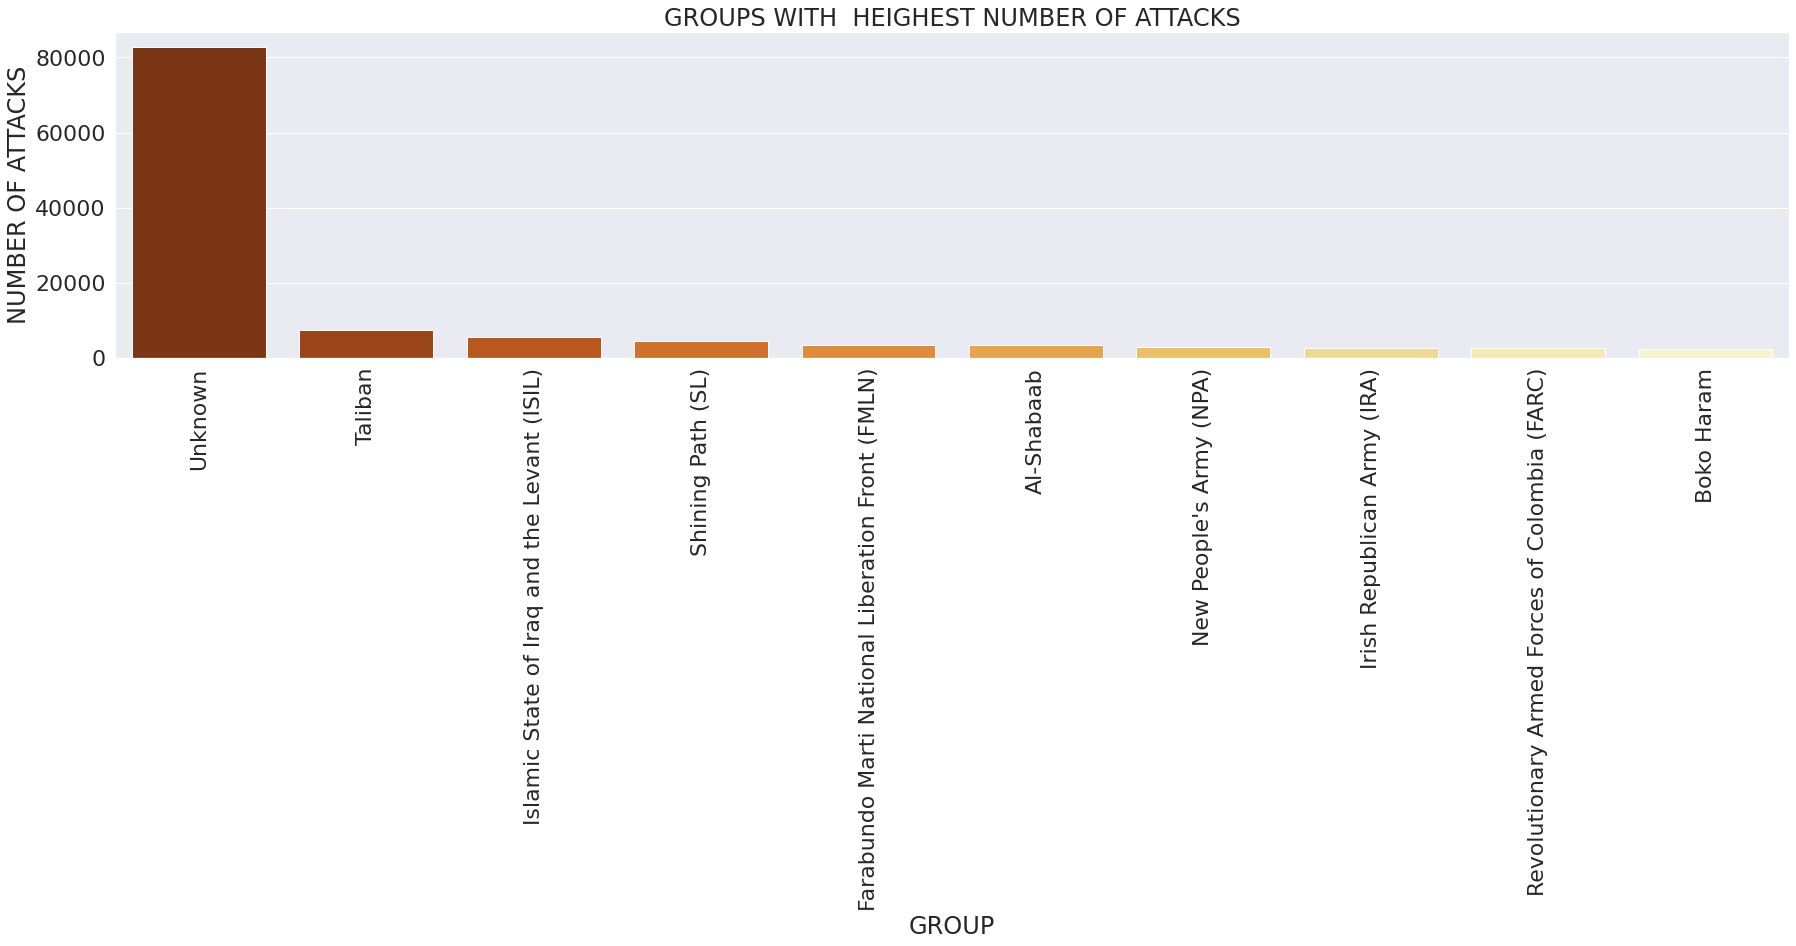

In [ ]:
plt.figure(figsize = (30,6))
plt.xticks(rotation = 90)
sns.countplot(x = 'Group', data=sample, palette = 'YlOrBr_r',  order = sample['Group'].value_counts().index[:10])
plt.xlabel('GROUP')
plt.ylabel('NUMBER OF ATTACKS')
plt.title('GROUPS WITH  HEIGHEST NUMBER OF ATTACKS')
plt.show()

In [ ]:
sample_grp= sample.groupby('Group')['Kills'].agg('sum').reset_index().sort_values(by='Kills', ascending=False).reset_index(drop=True)

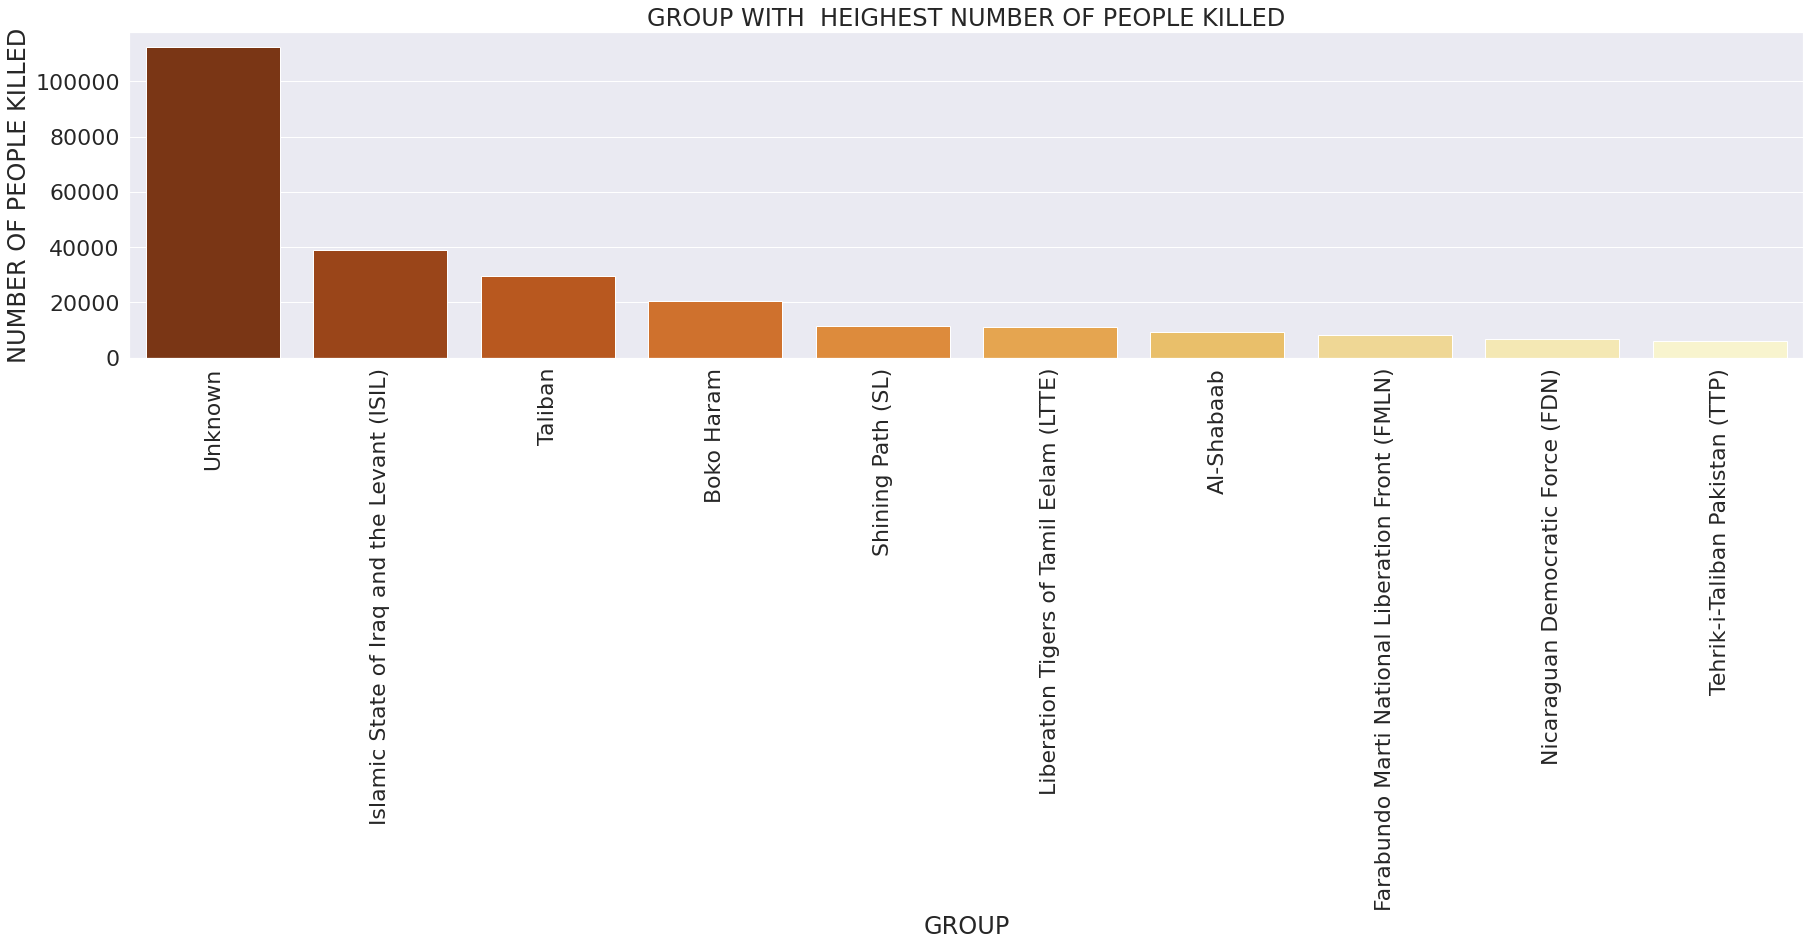

In [ ]:
plt.figure(figsize = (30,6))
sns.barplot(x = sample_grp["Group"].iloc[:10], y = sample_grp["Kills"].iloc[:10], palette="YlOrBr_r")
plt.xticks(rotation = 90)
plt.xlabel('GROUP')
plt.ylabel('NUMBER OF PEOPLE KILLED')
plt.title('GROUP WITH  HEIGHEST NUMBER OF PEOPLE KILLED')
plt.show()



---
# **WEAPON TYPE ANALYSIS**


---





In [ ]:
sample['Weapon_Type'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment', 'Vehicle', 'Fake Weapons',
       'Radiological', 'Other', 'Biological'], dtype=object)

In [ ]:
sample['Weapon_Type'] = sample['Weapon_Type'].replace(['Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'],'Vehicle')

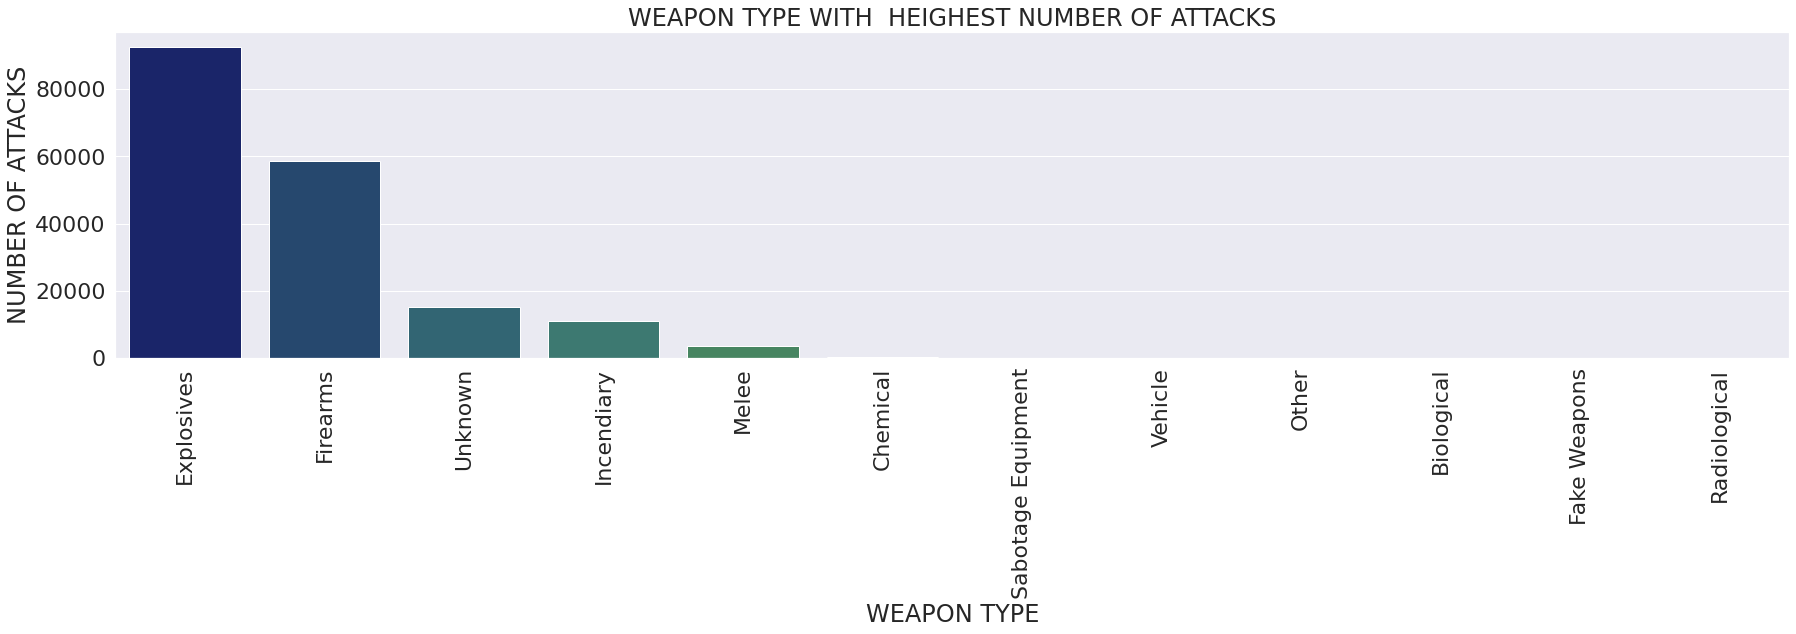

In [ ]:
plt.figure(figsize = (30,6))
sns.countplot(x = 'Weapon_Type', data=sample, palette = 'gist_earth',  order = sample['Weapon_Type'].value_counts().index[:68])
plt.xticks(rotation = 90)
plt.xlabel('WEAPON TYPE')
plt.ylabel('NUMBER OF ATTACKS')
plt.title('WEAPON TYPE WITH  HEIGHEST NUMBER OF ATTACKS')
plt.show()

In [ ]:
sample_weapon= sample.groupby('Weapon_Type')['Victims'].agg('sum').reset_index().sort_values(by='Victims', ascending=False).reset_index(drop=True)

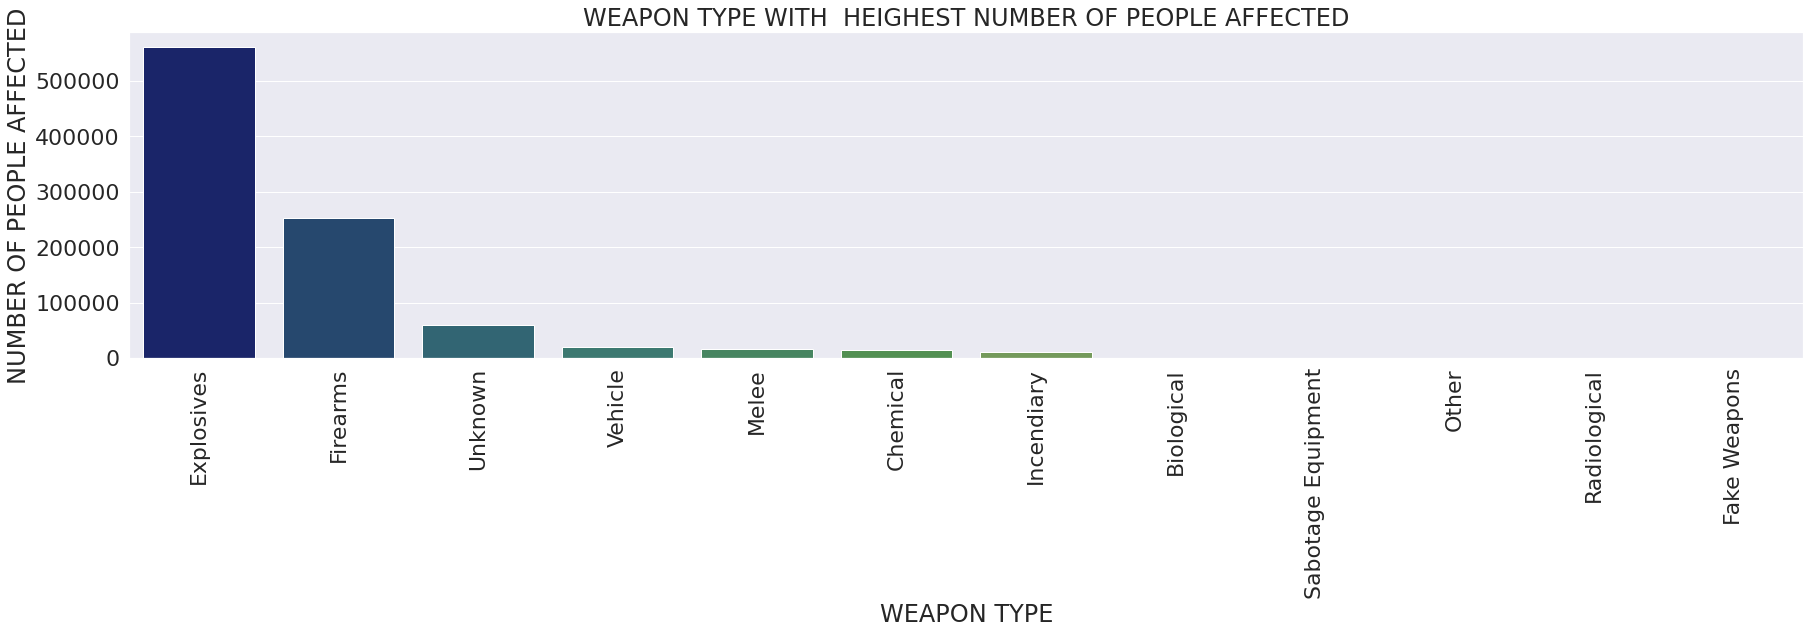

In [ ]:
plt.figure(figsize = (30,6))
sns.barplot(x = sample_weapon["Weapon_Type"], y = sample_weapon["Victims"], palette="gist_earth")
plt.xticks(rotation = 90)
plt.xlabel('WEAPON TYPE')
plt.ylabel('NUMBER OF PEOPLE AFFECTED')
plt.title('WEAPON TYPE WITH  HEIGHEST NUMBER OF PEOPLE AFFECTED')
plt.show()

# **OBSERVATION**



*   Explosives are the most commonly used weapon type and has caused more number of casualties.





---
# **ATTACK TYPE ANALYSIS**


---





In [ ]:
sample['Attack_Type'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

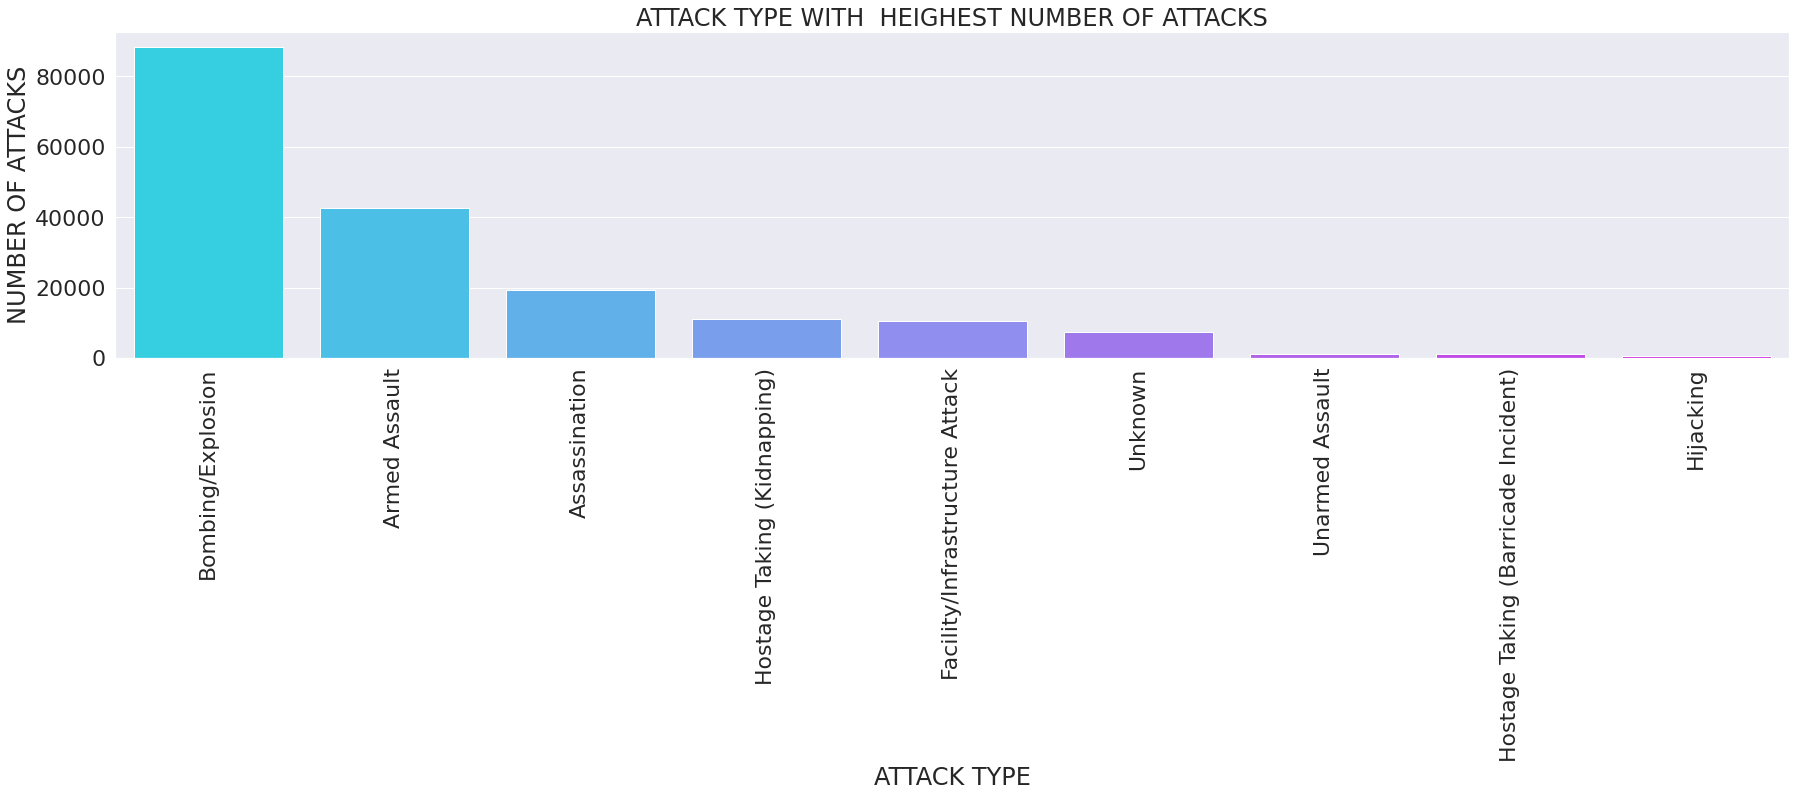

In [ ]:
plt.figure(figsize = (30,6))
sns.countplot(x = 'Attack_Type', data=sample, palette = 'cool',  order = sample['Attack_Type'].value_counts().index[:68])
plt.xticks(rotation = 90)
plt.xlabel('ATTACK TYPE')
plt.ylabel('NUMBER OF ATTACKS')
plt.title('ATTACK TYPE WITH  HEIGHEST NUMBER OF ATTACKS')
plt.show()

In [ ]:
sample_attack = sample.groupby('Attack_Type')['Victims'].agg('sum').reset_index().sort_values(by='Victims', ascending=False).reset_index(drop=True)

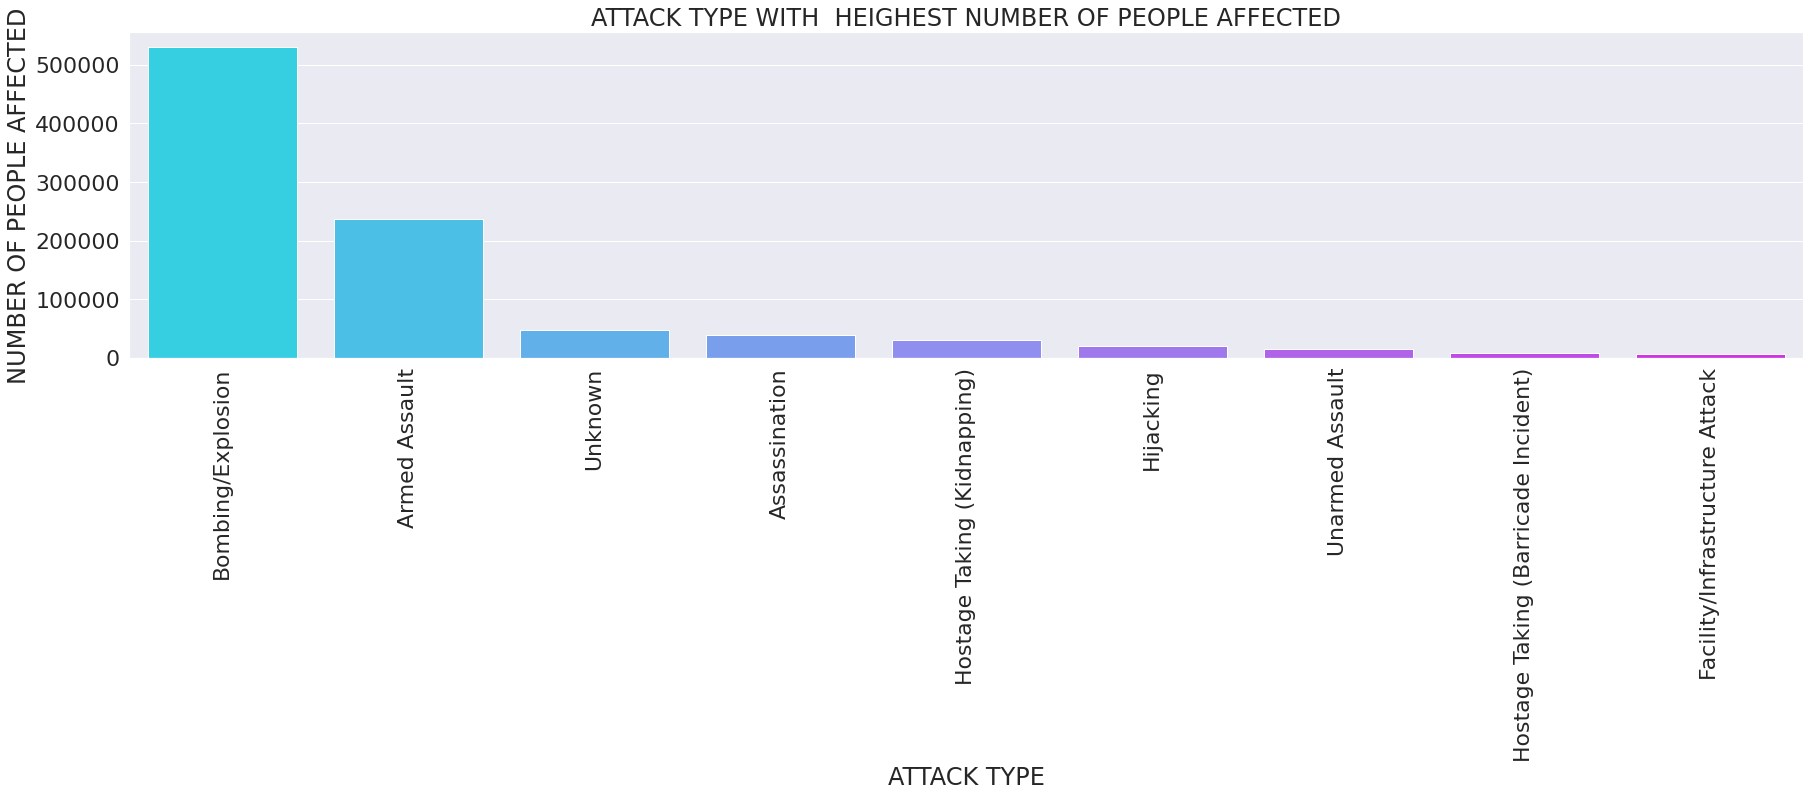

In [ ]:
plt.figure(figsize = (30,6))
ax = sns.barplot(x = sample_attack["Attack_Type"], y = sample_attack["Victims"], palette="cool")
plt.xticks(rotation = 90)
plt.xlabel('ATTACK TYPE')
plt.ylabel('NUMBER OF PEOPLE AFFECTED')
plt.title('ATTACK TYPE WITH  HEIGHEST NUMBER OF PEOPLE AFFECTED')
plt.show()

# **OBSERVATION**



*   Bombing/Explosion is the most used attack type and has caused more number of casualties.





---
# **TARGET TYPE ANALYSIS**


---




In [ ]:
sample['Target_Type'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

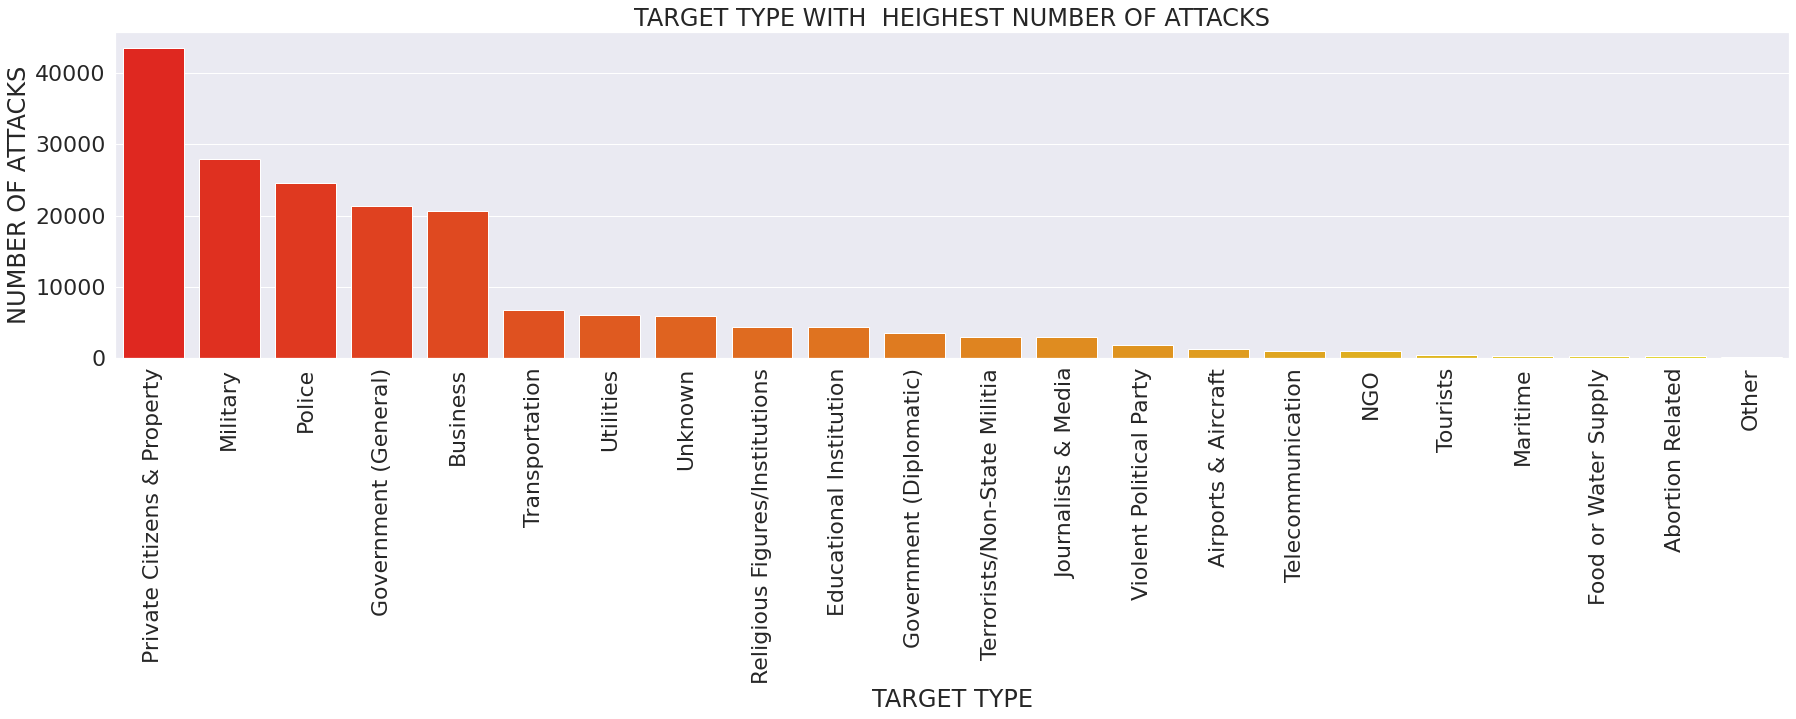

In [ ]:
plt.figure(figsize = (30,6))
sns.countplot(x = 'Target_Type', data=sample, palette = 'autumn',  order = sample['Target_Type'].value_counts().index[:68])
plt.xticks(rotation = 90)
plt.xlabel('TARGET TYPE')
plt.ylabel('NUMBER OF ATTACKS')
plt.title('TARGET TYPE WITH  HEIGHEST NUMBER OF ATTACKS')
plt.show()

In [ ]:
sample_target = sample.groupby('Target_Type')['Victims'].agg('sum').reset_index().sort_values(by='Victims', ascending=False).reset_index(drop=True)

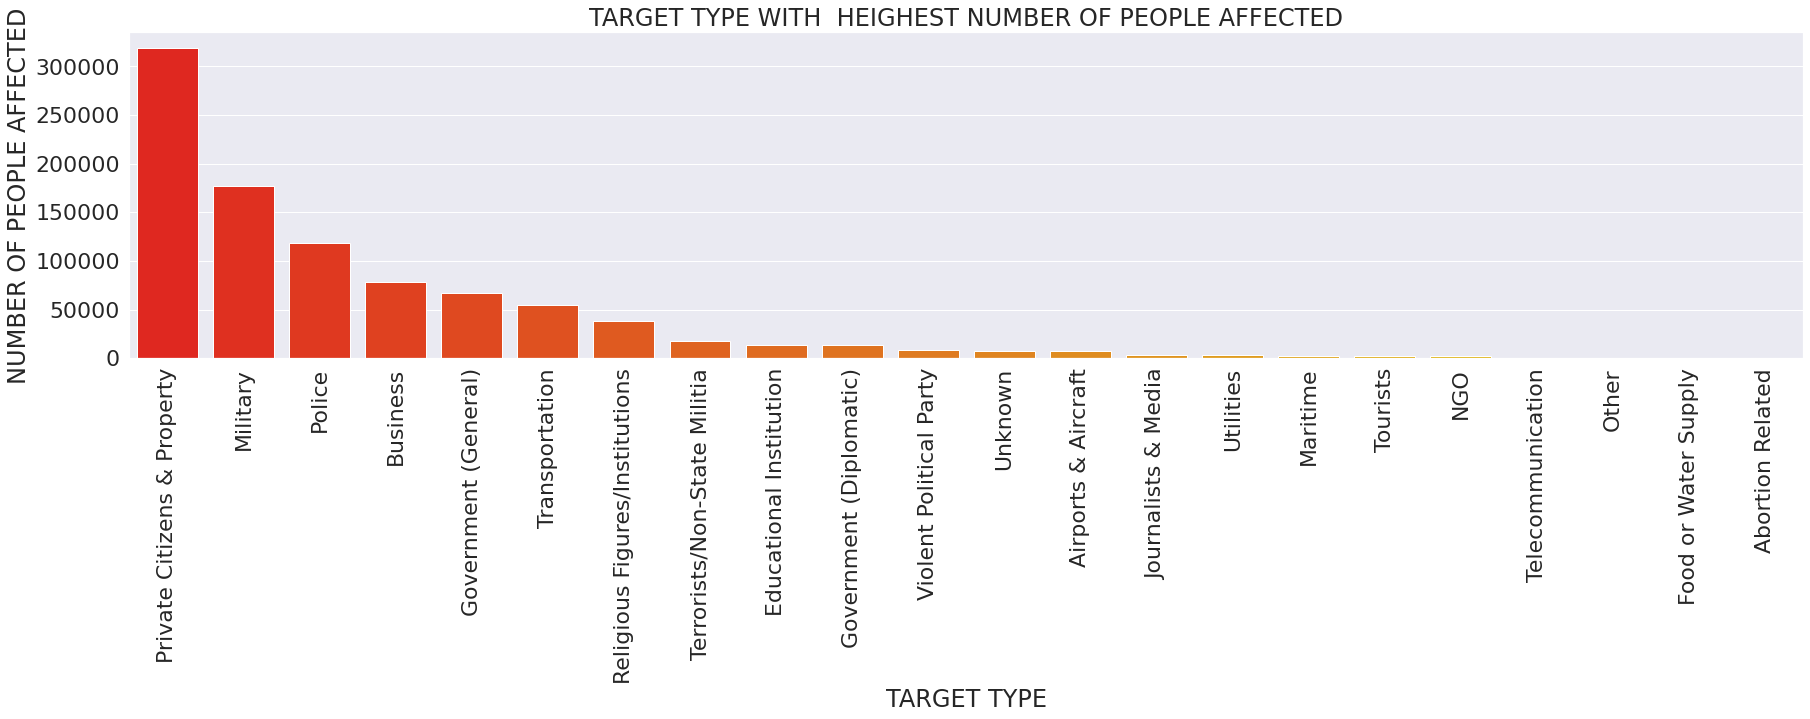

In [ ]:
plt.figure(figsize = (30,6))
sns.barplot(x = sample_target["Target_Type"], y = sample_target["Victims"], palette="autumn")
plt.xticks(rotation = 90)
plt.xlabel('TARGET TYPE')
plt.ylabel('NUMBER OF PEOPLE AFFECTED')
plt.title('TARGET TYPE WITH  HEIGHEST NUMBER OF PEOPLE AFFECTED')
plt.show()

# **OBSERVATION**


*   Private Citizens and Property is mostly targetted and caused most number of casualties.

